In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the transition matrix
arr = np.array([[0, 1/5, 1/5, 1/5, 0, 0, 0, 0, 1/5, 0, 0, 0, 1/5, 0],             ## Argentina
                [1/5, 0, 1/5, 1/5, 0, 0, 0, 0, 1/5, 1/5, 0, 0, 0, 0],             ## Bolivia
                [1/9, 1/9, 0, 0, 1/9, 0, 0, 1/9, 1/9, 1/9, 0, 1/9, 1/9, 1/9],     ## Brazil
                [1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 1/3, 0, 0, 0, 0],                 ## Chile
                [0, 0, 1/5, 0, 0, 1/5, 0, 0, 0, 1/5, 0, 0, 0, 1/5],               ## Colombia
                [0, 0, 0, 0, 1/2, 0, 0, 0, 0, 1/2, 0, 0, 0, 0],                   ## Ecuador
                [0, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 1/2, 0, 0],                   ## French Guiana
                [0, 0, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 1/3, 0, 1/3],                 ## Guyana
                [1/3, 1/3, 1/3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                 ## Paraguay
                [0, 1/5, 1/5, 1/5, 1/5, 1/5, 0, 0, 0, 0, 0, 0, 0, 0],             ## Peru
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],                       ## Falkland Islands
                [0, 0, 1/3, 0, 0, 0, 1/3, 1/3, 0, 0, 0, 0, 0, 0],                 ## Suriname
                [1/2, 0, 1/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                   ## Uruguay
                [0, 0, 1/3, 0, 1/3, 0, 0, 1/3, 0, 0, 0, 0, 0, 0]])                ## Venezuela

countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'French Guiana',
             'Guyana', 'Paraguay', 'Peru', 'Falkland Islands', 'Suriname', 'Uruguay', 'Venezuela']

# Convert the array to a Pandas DataFrame
df = pd.DataFrame(arr, columns=countries, index=countries)

# Display the DataFrame
df.round(1).style.format(precision=1).background_gradient(cmap ='inferno').set_properties(**{'font-size': '12px'})

,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,French Guiana,Guyana,Paraguay,Peru,Falkland Islands,Suriname,Uruguay,Venezuela
Argentina,0.0,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0
Bolivia,0.2,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0
Brazil,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.0,0.1,0.1,0.1
Chile,0.3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0
Colombia,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2
Ecuador,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
French Guiana,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
Guyana,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.3
Paraguay,0.3,0.3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Peru,0.0,0.2,0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Define the initial state vector (the spy is currently in Chile)
chile = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Print the probabilities of the spy being in each country after 10 days
prob_list = []
countries_list = []
days_list = []
for day in range(1, 100):
    prob_after_i_days = np.dot(chile, np.linalg.matrix_power(arr, day))
    for i, country in enumerate(countries):
        prob_list.append(prob_after_i_days[i])
        countries_list.append(country)
        days_list.append(day)

In [6]:
country_probability = pd.DataFrame(list(zip(days_list, countries_list, prob_list)),
                                  columns = ['day', 'country', 'probability'])

In [7]:
df_list = []
for day in range(2, 11):
    df_list.append(country_probability[country_probability["day"] == day].sort_values(by=['probability'], 
                                                                               ascending=False)[:1])
    
pd.concat(df_list, axis=0)

,day,country,probability
16,2,Brazil,0.200000
28,3,Argentina,0.193333
44,4,Brazil,0.182074
58,5,Brazil,0.171295
72,6,Brazil,0.177682
86,7,Brazil,0.174643
100,8,Brazil,0.174271
114,9,Brazil,0.172001
128,10,Brazil,0.169982


In [8]:
country_probability[country_probability["day"] == 99].sort_values(by=['probability'], 
                                                                               ascending=False)[:1]

,day,country,probability
1374,99,Brazil,0.039727


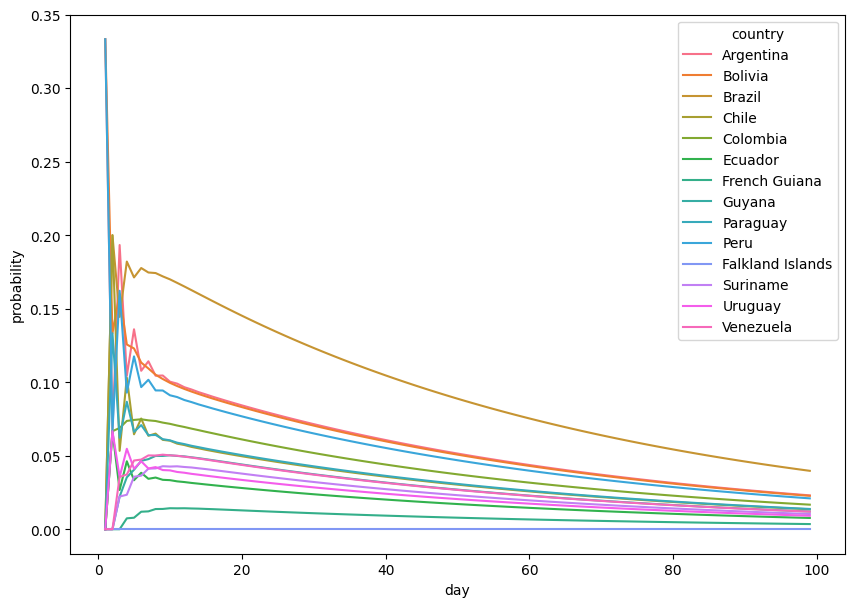

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=country_probability, x="day", y="probability", hue="country", ax=ax)
plt.show()